In [1]:
#-----..>> importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data=pd.read_csv("train_NIR5Yl1.csv")

In [4]:
#------------>>dropping outliers 
#data = data.drop(data[data.Views > 3000000].index)
#data = data.drop(data[data.Upvotes > 200000].index)
#data = data.drop(data[data.Reputation > 450000].index)

In [5]:
data['Reputation'].max()

1042428.0

In [6]:
data['Upvotes'].max()

615278.0

In [7]:
data.Views.max()

5231058.0

In [8]:
data['Reputation'].max()

1042428.0

In [9]:
#------> droping username and id which is not required 
data.drop(['Username','ID'],axis=1,inplace=True)

In [11]:
data

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0
5,r,440.0,1.0,5577.0,4.0
6,c,147.0,1.0,17184.0,17.0
7,j,2269.0,2.0,312.0,3.0
8,j,111.0,2.0,53738.0,79.0
9,c,2749.0,1.0,227.0,0.0


In [12]:
#-----------> converting categorical into binary using label encoder
labelencoder_X_0=LabelEncoder()

In [13]:
data['Tag']=labelencoder_X_0.fit_transform(data['Tag'])

In [14]:
#-------------->encoded
data

,Tag,Reputation,Answers,Views,Upvotes
0,0,3942.0,2.0,7855.0,42.0
1,0,26046.0,12.0,55801.0,1175.0
2,1,1358.0,4.0,8067.0,60.0
3,0,264.0,3.0,27064.0,9.0
4,1,4271.0,4.0,13986.0,83.0
5,7,440.0,1.0,5577.0,4.0
6,1,147.0,1.0,17184.0,17.0
7,4,2269.0,2.0,312.0,3.0
8,4,111.0,2.0,53738.0,79.0
9,1,2749.0,1.0,227.0,0.0


In [15]:
#--------------->>>>>>>VISULAISATION
corr=data.corr()

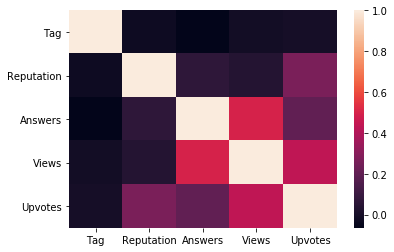

In [16]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


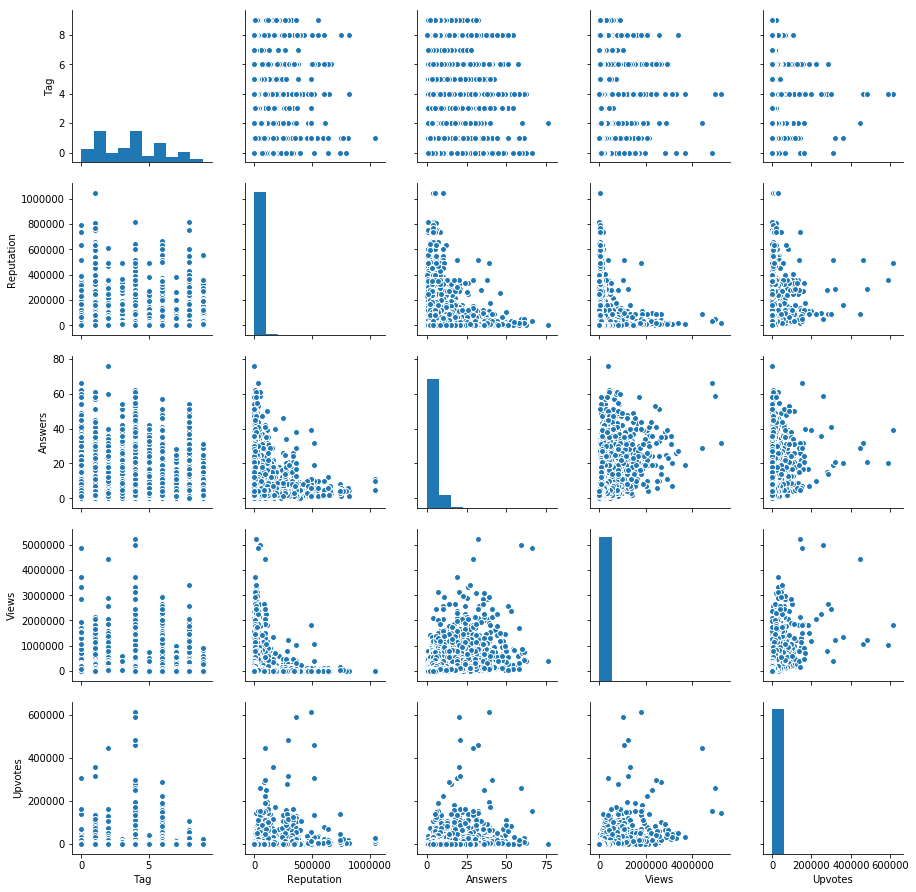

In [17]:
sns.pairplot(data)

In [18]:
#------------------->>>TRAINING

In [19]:
target=data['Upvotes']

In [20]:
#-------------------->here thershold is set to be 10 . ie it will map 0 if value is less than or equal to 10. else will map 1.
#-------->mapping 0 or 1 will decide wheather predence of feature will be consider or not.
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=10)
pd_watched = bn.transform([data['Answers']])[0]
data['pd_watched'] = pd_watched

In [21]:
feature_names = [x for x in data.columns if x not in ['Upvotes']] #selecting features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[feature_names], target,test_size = 0.22,random_state =205)
sc_X = StandardScaler()  #@standradization
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [22]:
poly_reg = PolynomialFeatures(degree = 4,interaction_only=False, include_bias=True)  #using polynomial funtion of degree 4, as there are 4 features in given datasets.
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_train, y_train)
lin_reg_1 = linear_model.LassoLars(alpha=0.021,max_iter=200)  #using linear  model with iteration 200.
lin_reg_1.fit(X_poly, y_train) #trainingg using Lassolars of linear model.

LassoLars(alpha=0.021, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=200, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [23]:
#--------->PREDICTION

In [35]:
pred=poly_reg.fit_transform(x_test) #fitting  X_test value into polynomial
pred_val = lin_reg_1.predict(pred)

print(r2_score(y_test, pred_val))

0.9118888706927538


In [25]:
#testing

In [26]:
test = pd.read_csv('test_8i3B3FC.csv')
ids = test['ID']
test.drop(['ID','Username'], axis=1,inplace =True)


In [27]:
test.corr()

,Reputation,Answers,Views
Reputation,1.000000,0.072639,0.038193
Answers,0.072639,1.000000,0.517076
Views,0.038193,0.517076,1.000000


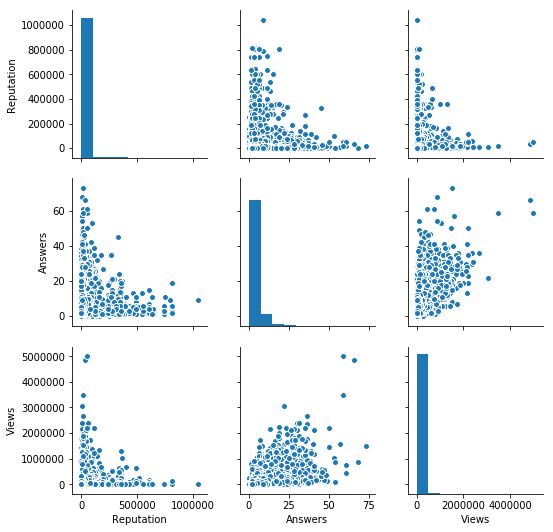

In [28]:
#------>>>>visulization
sns.pairplot(test)


In [29]:

from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=10)
pd_watched = bn.transform([test['Answers']])[0]
test['pd_watched'] = pd_watched
labelencoder_X = LabelEncoder()
test['Tag'] = labelencoder_X.fit_transform(test['Tag'])


   
test = sc_X.fit_transform(test)

pred_test = lin_reg_1.predict(poly_reg.fit_transform(test))
pred_test=abs(pred_test)

In [30]:
pred_test

array([208.67015555,  77.46799512,  49.08975254, ...,  65.4230891 ,
        32.96475943,  28.07731732])

In [31]:
submission = pd.DataFrame({'ID': ids,
                           'Upvotes':pred_test
                           })

submission.to_csv("final_sub.csv",index=False)

In [32]:
submission

,ID,Upvotes
0,366953,208.670156
1,71864,77.467995
2,141692,49.089753
3,316833,36.795535
4,440445,291.762082
5,3514,28.562247
6,331420,13.426069
7,406540,82.867852
8,227379,56.159536
9,331687,27.838713


In [33]:
pd.read_csv("final_sub.csv")

,ID,Upvotes
0,366953,208.670156
1,71864,77.467995
2,141692,49.089753
3,316833,36.795535
4,440445,291.762082
5,3514,28.562247
6,331420,13.426069
7,406540,82.867852
8,227379,56.159536
9,331687,27.838713
